# Ноутбук для соревнования. Тема: _Mental Health_
### Предобработка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('data/train.csv', index_col=0)

In [3]:
train_data

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


Размер тренировочных данных: 140700x20

Описание столбцов:
- `Name` - имя пациента;
- `Gender` - пол пациента;
- `Age` - возраст пациента;
- `City` - город проживания;
- `Working Professional or Student` - тип занятости: рабочий или студент;
- `Profession` - профессия(для студентов стоит пропуск);
- `Academic Pressure` - давление, которое испытывают студенты;
- `Work Pressure` - давление, которое испытывают рабочие;
- `CGPA` - средний балл студента;
- `Study Satisfaction` - удовлетворение от учебы;
- `Job Satisfaction` - удовлетворение от работы;
- `Sleep Duration` - длительность сна;
- `Dietry Habits` - привычки питания;
- `Degree` - уровень образования;
- `Have you ever had suicidal thoughts ?` - наличие суицидальных мыслей;
- `Work/Study Hours` - время нагрузки;
- `Financial Stress` - степень стресса, связанный с финансами;
- `Family History of Mental Illness` - имеется ли семейная история психических заболеваний;
- `Depression` - наличие депрессии у пациента

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  float

In [5]:
train_data.isna().sum()

Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [6]:
train_data.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [7]:
train_data.describe(include=['object'])

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,140700,140700,140700,140700,104070,140700,140696,140698,140700,140700
unique,422,2,98,2,64,36,23,115,2,2
top,Rohan,Male,Kalyan,Working Professional,Teacher,Less than 5 hours,Moderate,Class 12,No,No
freq,3178,77464,6591,112799,24906,38784,49705,14729,71138,70758


## EDA + FeatureExtracting

In [8]:
# Посмотрим на распределение профессий в зависимости от типа занятости 
train_data.groupby('Working Professional or Student', as_index=False).Profession.value_counts(dropna=False)

,Working Professional or Student,Profession,count
0,Student,NaN,27867
1,Student,Architect,8
2,Student,Teacher,6
3,Student,Digital Marketer,3
4,Student,Student,3
...,...,...,...
75,Working Professional,Pranav,1
76,Working Professional,Unveil,1
77,Working Professional,Visakhapatnam,1
78,Working Professional,Working Professional,1


Среди профессий есть некоторые аномалии: названия городов, научные степени и так далее. Заменим рабочих со связанными с наукой профессиями на `Researcher`, а остальных на `NaN`. Студентов с `Student` на `Unemployed`

In [9]:
train_data.loc[(train_data['Working Professional or Student'] == 'Student') & 
               (train_data.Profession == 'Student'), 'Profession'] = 'Unemployed'

to_researcher = ['B.Com', 'BE', 'Student', 'MBBS', 'BCA', 'BBA', 'B.Ed', 'M.Ed', 'PhD']
to_nan = ['Yogesh', 'LLM', 'Patna', 'Unveil', 'Nagpur', 'Pranav', 'Visakhapatnam', 'Yuvraj']

train_data.loc[(train_data['Working Professional or Student'] == 'Working Professional') &
               train_data.Profession.isin(to_researcher), 'Profession'] = 'Researcher'
train_data.loc[(train_data['Working Professional or Student'] == 'Working Professional') &
               train_data.Profession.isin(to_nan), 'Profession'] = np.nan

In [10]:
# Теперь составим рейтинг каждой работы
not_empty_workers = train_data[(train_data['Working Professional or Student'] != 'Student') & train_data['Profession'].notna()]

works_distribution = not_empty_workers.groupby('Profession').agg({
    'Work Pressure': 'mean', 
    'Job Satisfaction': 'mean'
})

jobs_counts = not_empty_workers.Profession.value_counts().reset_index().rename(columns={'count': 'Job Count'})

jobs_rates = np.ceil((works_distribution['Job Satisfaction'] - works_distribution['Work Pressure'] + 6) / 2)
jobs_rates = jobs_rates.reset_index().rename(columns={0: 'Job Rate'})

job_info = pd.merge(jobs_rates, jobs_counts, on='Profession')
job_info

,Profession,Job Rate,Job Count
0,Academic,3.0,5
1,Accountant,3.0,1339
2,Analyst,1.0,1
3,Architect,4.0,4362
4,Business Analyst,4.0,3161
5,Chef,3.0,2860
6,Chemist,3.0,2967
7,City Manager,3.0,1
8,Civil Engineer,3.0,1469
9,Consultant,4.0,4229


In [11]:
# Составляем новый датафрейм, в котором учитываем распределение работ от рейтинга
jobs_ratings = []
for i in range(5):
    sub_job_info = job_info[job_info['Job Rate'] == i + 1]
    jobs_ratings.append((sub_job_info.Profession.apply(lambda x: [x]) * sub_job_info['Job Count']).sum())

jobs_ratings = pd.DataFrame({'Jobs Rate': [1, 2, 3, 4, 5], 'Jobs': jobs_ratings})

In [12]:
empty_workers = train_data[(train_data['Working Professional or Student'] != 'Student') & 
                           train_data['Profession'].isna()]

empty_workers_rates = np.ceil((empty_workers['Job Satisfaction'] - 
                               empty_workers['Work Pressure'] + 6) / 2).to_frame().rename(columns={0: 'Job Rate'})

def random_job(rate):
    if pd.notna(rate):
        return np.random.choice(list(jobs_ratings.loc[jobs_ratings['Jobs Rate'] == rate, 'Jobs'])[0])
    else:  # Если нет рейтинга
        return 'Unemployed'

# Заполним рабочих, с неизвестной профессией
filled_professions = empty_workers_rates['Job Rate'].apply(random_job)
for i in filled_professions.index:
    train_data.loc[i, 'Profession'] = filled_professions.loc[i]

Теперь тривиальное заполнение

In [13]:
# Студентам логично в пропуски поставить отсутствие работы
train_data.loc[(train_data['Working Professional or Student'] == 'Student'), 'Profession'] = 'Unemployed'

# Для рабочих поставим академическое давление равное нулю
train_data.loc[(train_data['Working Professional or Student'] != 'Student') & train_data['Academic Pressure'].isna(), 'Academic Pressure'] = 0

# Для студентов поставим давление на работе равное нулю
train_data.loc[(train_data['Working Professional or Student'] == 'Student') & train_data['Work Pressure'].isna(), 'Work Pressure'] = 0

# Рабочим оценки CGPA поставим -1, чтоб сильно отличались от оценок студентов
train_data.loc[(train_data['Working Professional or Student'] != 'Student') & train_data['CGPA'].isna(), 'CGPA'] = -1

# Study Satisfaction пусть будет равен 0 для рабочих
train_data.loc[(train_data['Working Professional or Student'] != 'Student') & train_data['Study Satisfaction'].isna(), 'Study Satisfaction'] = 0

# Job Satisfaction для студентов аналогично занулим
train_data.loc[(train_data['Working Professional or Student'] == 'Student') & train_data['Job Satisfaction'].isna(), 'Job Satisfaction'] = 0

Исправим аномалии в столбцах `City`, `Sleep Duration`, `Dietary Habits`, `Degree`.

In [14]:
train_data.City.value_counts()

City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

In [15]:
real_cities = [
    'Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
    'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
    'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
    'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
    'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Delhi',
    'Bhopal', 'Indore'
]

# Заменим аномалии на самый частый класс
train_data.loc[~train_data.City.isin(real_cities), 'City'] = 'Kalyan'

In [16]:
train_data['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [17]:
valid_sleep_duration = ['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours']

# Заменяем на самый частый класс 
train_data.loc[~train_data['Sleep Duration'].isin(valid_sleep_duration), 'Sleep Duration'] = 'Less than 5 hours'

In [18]:
train_data.groupby('Working Professional or Student')['Dietary Habits'].value_counts()

Working Professional or Student  Dietary Habits   
Student                          Unhealthy            10317
                                 Moderate              9921
                                 Healthy               7651
                                 1.0                      1
                                 2                        1
                                 3                        1
                                 Less Healthy             1
                                 Less than Healthy        1
                                 M.Tech                   1
                                 Male                     1
                                 Mihir                    1
                                 No Healthy               1
                                 Yes                      1
Working Professional             Moderate             39784
                                 Healthy              37090
                                 Unhealthy       

In [19]:
# Выделенные нами привычки питания
accessed_habits = ['Healthy', 'Unhealthy', 'Moderate']

train_data.loc[(train_data['Working Professional or Student'] == 'Student') & 
               ~train_data['Dietary Habits'].isin(accessed_habits), 'Dietary Habits'] = 'Unhealthy'  
train_data.loc[(train_data['Working Professional or Student'] != 'Student') & 
               ~train_data['Dietary Habits'].isin(accessed_habits), 'Dietary Habits'] = 'Moderate'

In [20]:
train_data['Degree'].value_counts()

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 115, dtype: int64

In [21]:
# Из этих значений реальными степенями образования являются значения в списке:
education_degrees = ["Class 10", "Class 12", "BHM", "LLB", "B.Pharm", "BBA", "MCA", "MD", "BSc", "ME", "B.Arch",
                     "BCA", "BE", "MA", "B.Ed", "B.Com", "MBA", "M.Com", "MHM", "BA", "M.Tech", "PhD", "M.Ed",
                     "MSc", "B.Tech", "LLM", "MBBS", "M.Pharm", "M.Arch", "P.Com", "M.S", "K.Ed"]

# Заменим аномалии и пропуски значением 'Class 12'
train_data.loc[~train_data['Degree'].isin(education_degrees), 'Degree'] = 'Class 12'

Заполним пропуски численных данных

In [22]:
def show_cols_dist(data):  # Функция отображает распределения столбцов
    for i in range(data.shape[1]):
        plt.subplot(3, 3, i + 1)
        sns.kdeplot(data.iloc[:, i], label=data.columns[i])
        
        plt.legend()

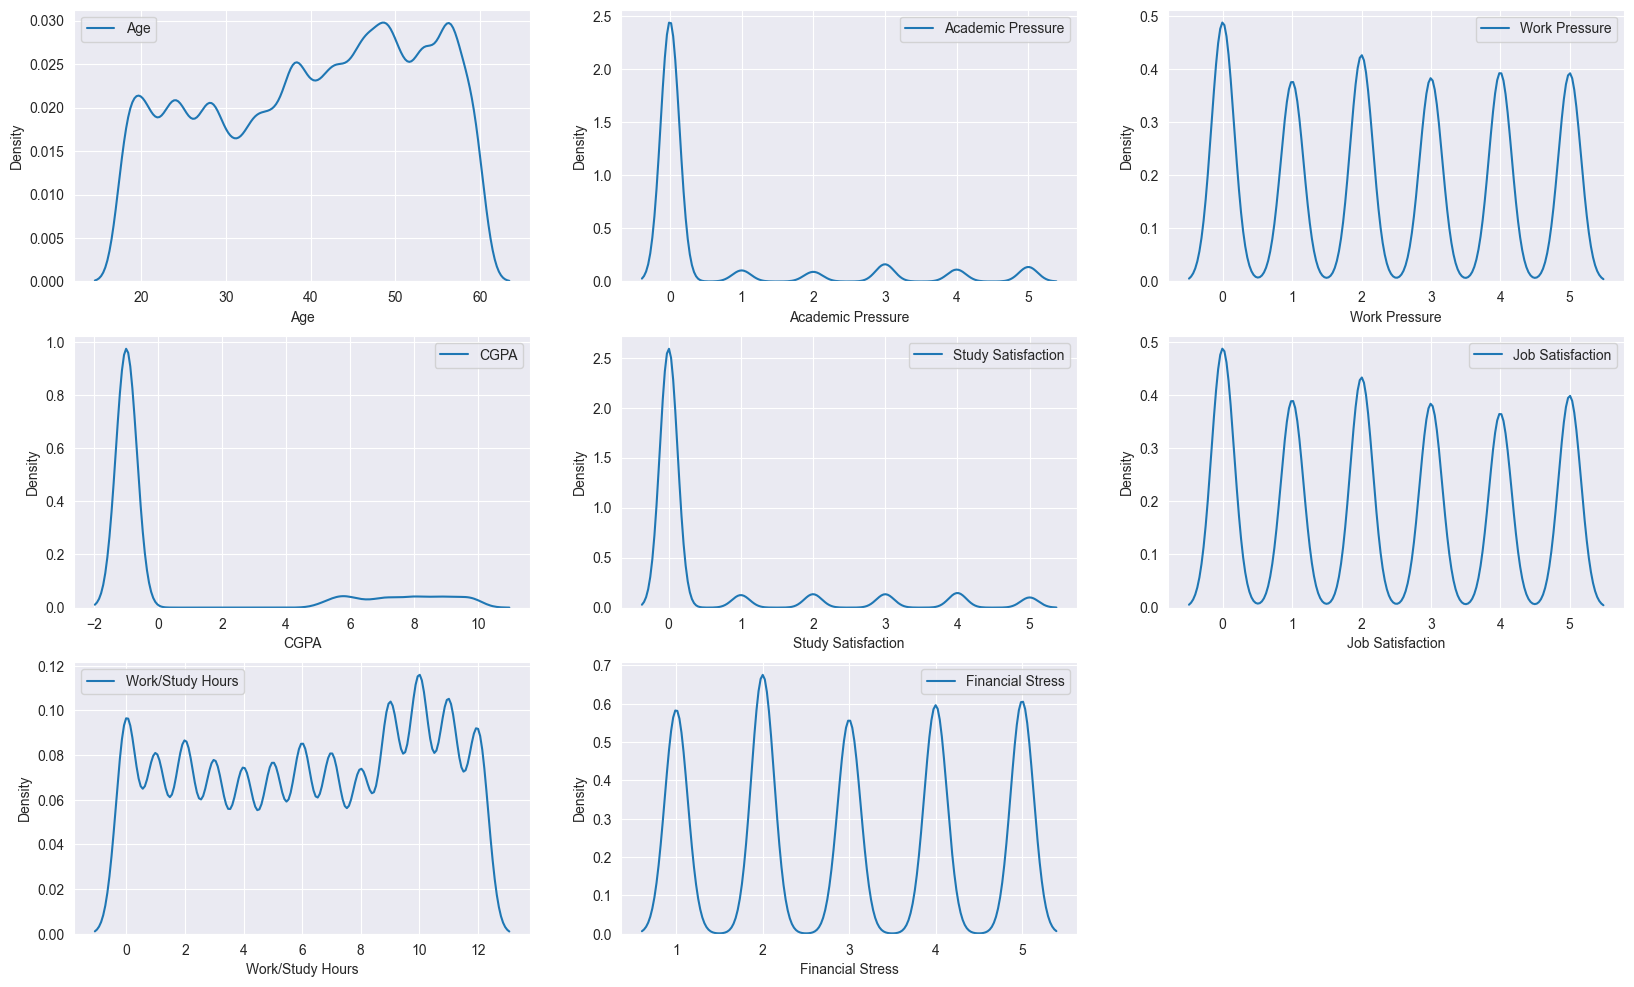

In [23]:
from sklearn.impute import KNNImputer

numerical_train_data = train_data.select_dtypes(include=np.number)
numerical_train_data = numerical_train_data.iloc[:, numerical_train_data.columns != 'Depression']

filler = KNNImputer(n_neighbors=5)
numerical_train_data.iloc[:] = filler.fit_transform(numerical_train_data)

plt.figure(figsize=(20, 12))
show_cols_dist(numerical_train_data)  # Распределение данных

In [24]:
train_data[numerical_train_data.columns] = numerical_train_data
train_data

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,-1.00,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,-1.00,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,Unemployed,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,-1.00,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,-1.00,0.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Vidya,Female,18.0,Ahmedabad,Working Professional,Teacher,0.0,5.0,-1.00,0.0,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,0.0,5.0,-1.00,0.0,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,0.0,3.0,-1.00,0.0,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


In [25]:
# Добавим рейтинг рабочей занятости
train_data = train_data.merge(job_info[['Profession', 'Job Rate']], on='Profession', how='left')

Теперь то же самое проделаем для тестового датасета

In [38]:
test_data = pd.read_csv('data/test.csv', index_col=0)

In [39]:
test_data

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,,
140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
234497,Rishi,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No


In [40]:
test_data.isna().sum()

Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

Заполним пропуски и избавимся от аномалий

In [42]:
test_data.loc[(test_data['Working Professional or Student'] == 'Student') & 
              (test_data.Profession == 'Student'), 'Profession'] = 'Unemployed'

test_data.loc[(test_data['Working Professional or Student'] == 'Working Professional') &
               test_data.Profession.isin(to_researcher), 'Profession'] = 'Researcher'

test_data.loc[(test_data['Working Professional or Student'] == 'Working Professional') &
               ~test_data.Profession.isin(train_data.Profession.unique()), 'Profession'] = np.nan

empty_workers = test_data[(test_data['Working Professional or Student'] != 'Student') & 
                          test_data['Profession'].isna()]

empty_workers_rates = np.ceil((empty_workers['Job Satisfaction'] - 
                               empty_workers['Work Pressure'] + 6) / 2).to_frame().rename(columns={0: 'Job Rate'})

filled_professions = empty_workers_rates['Job Rate'].apply(random_job)
for i in filled_professions.index:
    test_data.loc[i, 'Profession'] = filled_professions.loc[i]

In [43]:
test_data.loc[(test_data['Working Professional or Student'] == 'Student'), 'Profession'] = 'Unemployed'

test_data.loc[(test_data['Working Professional or Student'] != 'Student') & 
              test_data['Academic Pressure'].isna(), 'Academic Pressure'] = 0

test_data.loc[(test_data['Working Professional or Student'] == 'Student') & 
               test_data['Work Pressure'].isna(), 'Work Pressure'] = 0

test_data.loc[(test_data['Working Professional or Student'] != 'Student') & 
              test_data['CGPA'].isna(), 'CGPA'] = -1

test_data.loc[(test_data['Working Professional or Student'] != 'Student') & 
              test_data['Study Satisfaction'].isna(), 'Study Satisfaction'] = 0

test_data.loc[(test_data['Working Professional or Student'] == 'Student') & 
              test_data['Job Satisfaction'].isna(), 'Job Satisfaction'] = 0

In [44]:
test_data.loc[~test_data.City.isin(real_cities), 'City'] = 'Kalyan'

test_data.loc[~test_data['Sleep Duration'].isin(valid_sleep_duration), 'Sleep Duration'] = 'Less than 5 hours'

test_data.loc[(test_data['Working Professional or Student'] == 'Student') & 
              ~test_data['Dietary Habits'].isin(accessed_habits), 'Dietary Habits'] = 'Unhealthy'  
test_data.loc[(test_data['Working Professional or Student'] != 'Student') & 
              ~test_data['Dietary Habits'].isin(accessed_habits), 'Dietary Habits'] = 'Moderate'

test_data.loc[~test_data['Degree'].isin(education_degrees), 'Degree'] = 'Class 12'

In [45]:
numerical_test_data = test_data.select_dtypes(include=np.number)
numerical_test_data = numerical_test_data.iloc[:, numerical_test_data.columns != 'Depression']

numerical_test_data.iloc[:] = filler.transform(numerical_test_data)
test_data[numerical_test_data.columns] = numerical_test_data

In [46]:
test_data = test_data.merge(job_info[['Profession', 'Job Rate']], on='Profession', how='left')

Сохраним обработанные данные

In [48]:
train_data.to_csv('data/processed_train.csv', index=False)
test_data.to_csv('data/processed_test.csv', index=False)